<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 323: Cloud Computing and Big Data</h2>
<h3 style = "text-align:center">Assignment 3: Spark Data Analysis</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 21, 2023</div>
This assignment counts for 10% of the final grade
</div>

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Spark programming basics. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Answer the following questions
### Note: All the programming must be done in Spark.

# <span style="color:red">Add Your Name Here after the colon: Lixiao Yang</span>

In [0]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [0]:
# check availability of Spark
spark.version

Out[3]: '3.1.2'

## Data Ingest:
### Go to the Storage section of the GCP web console and create a new bucket
### Open CloudShell and git clone this repo: `git clone https://github.com/GoogleCloudPlatform/data-science-on-gcp`
### Then, run:
- `cd data-science-on-gcp/02_ingest`
- `./ingest_from_crsbucket bucketname`
- `./bqload.sh (csv-bucket-name) YEAR`
- `cd ../03_sqlstudio`
- `./create_views.sh`
- `cd ../04_streaming`
- `./ingest_from_crsbucket.sh`

After the above steps, 26 JSON files should appear in the folder "flights/tzcorr/' in the bucket.

In [0]:
dbutils.fs.ls("s3://info323-ya45-spring2023/tzcorr")

Out[4]: [FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00000-of-00026.json', name='flights_tzcorr_all_flights-00000-of-00026.json', size=45703666),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00001-of-00026.json', name='flights_tzcorr_all_flights-00001-of-00026.json', size=210304842),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00002-of-00026.json', name='flights_tzcorr_all_flights-00002-of-00026.json', size=53048572),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00003-of-00026.json', name='flights_tzcorr_all_flights-00003-of-00026.json', size=16055501),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00004-of-00026.json', name='flights_tzcorr_all_flights-00004-of-00026.json', size=457125784),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00005-of-00026.json', name='flights_tzcorr_all_flights-00005-of-00026.json', size=34867958),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00006-of-00026.json', name='flights_tzcorr_all_flights-00006-of-00026.json', size=99665215),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00007-of-00026.json', name='flights_tzcorr_all_flights-00007-of-00026.json', size=260615598),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00008-of-00026.json', name='flights_tzcorr_all_flights-00008-of-00026.json', size=26363387),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00009-of-00026.json', name='flights_tzcorr_all_flights-00009-of-00026.json', size=296051786),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00010-of-00026.json', name='flights_tzcorr_all_flights-00010-of-00026.json', size=19868932),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00011-of-00026.json', name='flights_tzcorr_all_flights-00011-of-00026.json', size=227308594),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00012-of-00026.json', name='flights_tzcorr_all_flights-00012-of-00026.json', size=12452046),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00013-of-00026.json', name='flights_tzcorr_all_flights-00013-of-00026.json', size=44214516),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00014-of-00026.json', name='flights_tzcorr_all_flights-00014-of-00026.json', size=19493083),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00015-of-00026.json', name='flights_tzcorr_all_flights-00015-of-00026.json', size=253026311),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00016-of-00026.json', name='flights_tzcorr_all_flights-00016-of-00026.json', size=229340092),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00017-of-00026.json', name='flights_tzcorr_all_flights-00017-of-00026.json', size=461509894),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00018-of-00026.json', name='flights_tzcorr_all_flights-00018-of-00026.json', size=7979298),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00019-of-00026.json', name='flights_tzcorr_all_flights-00019-of-00026.json', size=3341618),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00020-of-00026.json', name='flights_tzcorr_all_flights-00020-of-00026.json', size=1541142),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00021-of-00026.json', name='flights_tzcorr_all_flights-00021-of-00026.json', size=8896756),
 FileInfo(path='s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00022-of-00026.json', name='flights_tzcorr_all_flights-00022-of-00026.json', size=508281771),
 FileInfo(path='s3://info323-ya

## 1. Create a Spark DataFrame from one of the "all_flights-000xx-of-00026" JSON files.

In [0]:
# Read JSON file into Spark DataFrame
json_file_path = "s3://info323-ya45-spring2023/tzcorr/flights_tzcorr_all_flights-00015-of-00026.json"
df = spark.read.json(json_file_path)
df.head(10)

Out[5]: [Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=-15.0, ARR_TIME='2015-12-02T15:37:00', CANCELLED=False, CRS_ARR_TIME='2015-12-02T15:52:00', CRS_DEP_TIME='2015-12-02T11:59:00', DEP_AIRPORT_LAT=40.64, DEP_AIRPORT_LON=-73.77861111, DEP_AIRPORT_TZOFFSET=-18000.0, DEP_DELAY=-2.0, DEP_TIME='2015-12-02T11:57:00', DEST='SJU', DEST_AIRPORT_SEQ_ID='1484304', DISTANCE='1598.00', DIVERTED=False, FL_DATE='2015-12-02', ORIGIN='JFK', ORIGIN_AIRPORT_SEQ_ID='1247803', TAXI_IN=3.0, TAXI_OUT=25.0, UNIQUE_CARRIER='B6', WHEELS_OFF='2015-12-02T12:22:00', WHEELS_ON='2015-12-02T15:34:00'),
 Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=13.0, ARR_TIME='2015-12-07T00:41:00', CANCELLED=False, CRS_ARR_TIME='2015-12-07T00:28:00', CRS_DEP_TIME='2015-12-06T20:30:00', DEP_AIRPORT_LAT=40.64, DEP_AIRPORT_LON=-73.77861111, DEP_AIRPORT_TZOFFSET=-18000.0, DEP_DELAY=11.0, DEP_TIME='2015-12-06T20:41:00', DEST='SJU', DEST_AIRPORT_SEQ_ID='1484304', DISTANCE='1598.00', DIVERTED=False, FL_DATE='2015-12-06', ORIGIN='JFK', ORIGIN_AIRPORT_SEQ_ID='1247803', TAXI_IN=6.0, TAXI_OUT=39.0, UNIQUE_CARRIER='B6', WHEELS_OFF='2015-12-06T21:20:00', WHEELS_ON='2015-12-07T00:35:00'),
 Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=63.0, ARR_TIME='2015-12-14T09:45:00', CANCELLED=False, CRS_ARR_TIME='2015-12-14T08:42:00', CRS_DEP_TIME='2015-12-15T04:59:00', DEP_AIRPORT_LAT=40.64, DEP_AIRPORT_LON=-73.77861111, DEP_AIRPORT_TZOFFSET=-18000.0, DEP_DELAY=64.0, DEP_TIME='2015-12-14T06:03:00', DEST='SJU', DEST_AIRPORT_SEQ_ID='1484304', DISTANCE='1598.00', DIVERTED=False, FL_DATE='2015-12-14', ORIGIN='JFK', ORIGIN_AIRPORT_SEQ_ID='1247803', TAXI_IN=4.0, TAXI_OUT=23.0, UNIQUE_CARRIER='B6', WHEELS_OFF='2015-12-14T06:26:00', WHEELS_ON='2015-12-14T09:41:00'),
 Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=9.0, ARR_TIME='2015-12-13T20:39:00', CANCELLED=False, CRS_ARR_TIME='2015-12-13T20:30:00', CRS_DEP_TIME='2015-12-13T16:46:00', DEP_AIRPORT_LAT=40.64, DEP_AIRPORT_LON=-73.77861111, DEP_AIRPORT_TZOFFSET=-18000.0, DEP_DELAY=17.0, DEP_TIME='2015-12-13T17:03:00', DEST='SJU', DEST_AIRPORT_SEQ_ID='1484304', DISTANCE='1598.00', DIVERTED=False, FL_DATE='2015-12-13', ORIGIN='JFK', ORIGIN_AIRPORT_SEQ_ID='1247803', TAXI_IN=4.0, TAXI_OUT=22.0, UNIQUE_CARRIER='B6', WHEELS_OFF='2015-12-13T17:25:00', WHEELS_ON='2015-12-13T20:35:00'),
 Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=-9.0, ARR_TIME='2015-12-13T03:33:00', CANCELLED=False, CRS_ARR_TIME='2015-12-13T03:42:00', CRS_DEP_TIME='2015-12-12T23:47:00', DEP_AIRPORT_LAT=40.64, DEP_AIRPORT_LON=-73.77861111, DEP_AIRPORT_TZOFFSET=-18000.0, DEP_DELAY=-2.0, DEP_TIME='2015-12-12T23:45:00', DEST='SJU', DEST_AIRPORT_SEQ_ID='1484304', DISTANCE='1598.00', DIVERTED=False, FL_DATE='2015-12-12', ORIGIN='JFK', ORIGIN_AIRPORT_SEQ_ID='1247803', TAXI_IN=5.0, TAXI_OUT=25.0, UNIQUE_CARRIER='B6', WHEELS_OFF='2015-12-13T00:10:00', WHEELS_ON='2015-12-13T03:28:00'),
 Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=-2.0, ARR_TIME='2015-12-28T23:37:00', CANCELLED=False, CRS_ARR_TIME='2015-12-28T23:39:00', CRS_DEP_TIME='2015-12-28T19:49:00', DEP_AIRPORT_LAT=40.64, DEP_AIRPORT_LON=-73.77861111, DEP_AIRPORT_TZOFFSET=-18000.0, DEP_DELAY=9.0, DEP_TIME='2015-12-28T19:58:00', DEST='SJU', DEST_AIRPORT_SEQ_ID='1484304', DISTANCE='1598.00', DIVERTED=False, FL_DATE='2015-12-28', ORIGIN='JFK', ORIGIN_AIRPORT_SEQ_ID='1247803', TAXI_IN=6.0, TAXI_OUT=24.0, UNIQUE_CARRIER='B6', WHEELS_OFF='2015-12-28T20:22:00', WHEELS_ON='2015-12-28T23:31:00'),
 Row(ARR_AIRPORT_LAT=18.43944444, ARR_AIRPORT_LON=-66.00222222, ARR_AIRPORT_TZOFFSET=-14400.0, ARR_DELAY=-1.0, ARR_TIME='2015-12-26T23:38:00', CANCELLED=False, CRS_ARR_TIME='2015-12-26T23:39:00', CRS_DEP_TIME='2015-12-2

## 2. Create a relational view for Spark SQL queries.

In [0]:
df.createOrReplaceTempView("flights_view")

## 3. Print the Schema of the Data

In [0]:
df.printSchema()

root
-- ARR_AIRPORT_LAT: double (nullable = true)
-- ARR_AIRPORT_LON: double (nullable = true)
-- ARR_AIRPORT_TZOFFSET: double (nullable = true)
-- ARR_DELAY: double (nullable = true)
-- ARR_TIME: string (nullable = true)
-- CANCELLED: boolean (nullable = true)
-- CRS_ARR_TIME: string (nullable = true)
-- CRS_DEP_TIME: string (nullable = true)
-- DEP_AIRPORT_LAT: double (nullable = true)
-- DEP_AIRPORT_LON: double (nullable = true)
-- DEP_AIRPORT_TZOFFSET: double (nullable = true)
-- DEP_DELAY: double (nullable = true)
-- DEP_TIME: string (nullable = true)
-- DEST: string (nullable = true)
-- DEST_AIRPORT_SEQ_ID: string (nullable = true)
-- DISTANCE: string (nullable = true)
-- DIVERTED: boolean (nullable = true)
-- FL_DATE: string (nullable = true)
-- ORIGIN: string (nullable = true)
-- ORIGIN_AIRPORT_SEQ_ID: string (nullable = true)
-- TAXI_IN: double (nullable = true)
-- TAXI_OUT: double (nullable = true)
-- UNIQUE_CARRIER: string (nullable = true)
-- WHEELS_OFF: string (nullable = true)
-- WHEELS_ON: string (nullable = true)

## 4. Find all the unique origin airports. Show the top up to 20 results.

In [0]:
unique_origins = spark.sql("SELECT DISTINCT ORIGIN FROM flights_view LIMIT 20")
unique_origins.show()

+------+
ORIGIN|
+------+
 MSY|
 OAK|
 PDX|
 PHX|
 ORD|
 MSP|
 PHL|
 CMH|
 CAK|
 CVG|
 CHS|
 ALB|
 BMI|
 ABQ|
 BDL|
 ABY|
 BQK|
 BHM|
 DAY|
 VPS|
+------+

In [0]:
unique_origins = df.select("ORIGIN").distinct()
unique_origins.show(20, truncate=False)

+------+
ORIGIN|
+------+
MSY |
OAK |
PDX |
PHX |
ORD |
MSP |
PHL |
CMH |
CAK |
CVG |
DHN |
CHS |
ALB |
BMI |
ABQ |
BDL |
ABY |
BQK |
BHM |
DAY |
+------+
only showing top 20 rows

## 5. Find all the unique destination airports. Show the top up to 20 results.

In [0]:
unique_origins = spark.sql("SELECT DISTINCT dest FROM flights_view LIMIT 20")
unique_origins.show()

+----+
dest|
+----+
 GEG|
 GRB|
 GTF|
 GRR|
 CMH|
 CVG|
 GFK|
 BJI|
 RST|
 RSW|
 DLH|
 BOI|
 BRD|
 BDL|
 ABR|
 FSD|
 HIB|
 FWA|
 BZN|
 ANC|
+----+

## 6. Find the number of flights for each origin airports. Order the results by the numbers of flights in descending order.

In [0]:
flights_per_origin = spark.sql("SELECT origin, COUNT(*) AS num_flights FROM flights_view GROUP BY origin ORDER BY num_flights DESC")
flights_per_origin.show()

+------+-----------+
origin|num_flights|
+------+-----------+
 ORD| 73612|
 MSP| 20626|
 SLC| 18808|
 PHX| 18548|
 LAX| 16157|
 SFO| 15784|
 MCO| 13706|
 SEA| 13677|
 LAS| 13060|
 MDW| 11177|
 LGA| 9020|
 TPA| 6114|
 MIA| 5093|
 OAK| 4217|
 JFK| 3319|
 PHL| 3270|
 PDX| 3226|
 SMF| 2791|
 JAX| 2778|
 BOS| 2590|
+------+-----------+
only showing top 20 rows

## 7. Find the distinct origin and destination where flights fly from an airport with higher latitude.

In [0]:
flight_df = spark.sql("SELECT origin, dest, DEP_AIRPORT_LAT, ARR_AIRPORT_LAT FROM flights_view")
filtered_df = flight_df.filter(flight_df.DEP_AIRPORT_LAT > flight_df.ARR_AIRPORT_LAT)
distinct_routes = filtered_df.select("origin", "dest").distinct()
distinct_routes.show()

+------+----+
origin|dest|
+------+----+
 JFK| SRQ|
 LAS| ABQ|
 JFK| SAV|
 JFK| PIT|
 JFK| RSW|
 JFK| BUR|
 JFK| SJU|
 JFK| RNO|
 JFK| CMH|
 JFK| ABQ|
 JFK| EGE|
 JFK| PSP|
 LAS| BHM|
 JFK| CHS|
 JFK| LGB|
 JFK| BQN|
 JFK| STT|
 JFK| PSE|
 JFK| CVG|
 JFK| PBI|
+------+----+
only showing top 20 rows

## 8. List all the flights (origin, dest, distance) from PHL ordered by the distances in ascending order.

In [0]:
phl_flights = spark.sql("SELECT origin, dest, distance FROM flights_view WHERE origin = 'PHL' ORDER BY distance")
phl_flights.show()

+------+----+--------+
origin|dest|distance|
+------+----+--------+
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
 PHL| SJU| 1576.00|
+------+----+--------+
only showing top 20 rows

## 9. Are there any columns with missing values?  Print summary statistics for all the columns, e.g., using the describe().toPandas() method.

In [0]:
# Check for missing values in each column
missing_columns = []
for column in spark.table("flights_view").columns:
    null_count = spark.table("flights_view").filter(spark.table("flights_view")[column].isNull()).count()
    if null_count > 0:
        missing_columns.append(column)

if len(missing_columns) > 0:
    print("Columns with missing values:", missing_columns)
else:
    print("No columns with missing values.")

summary_df = spark.table("flights_view").select(missing_columns).describe()
summary_statistics = summary_df.toPandas()
summary_statistics

Columns with missing values: ['ARR_DELAY', 'DEP_DELAY', 'TAXI_IN', 'TAXI_OUT']
 summary ARR_DELAY ... TAXI_IN TAXI_OUT
0 count 354364 ... 355101 355430
1 mean 4.174820241333769 ... 5.944621389407521 16.92153166586951
2 stddev 37.413439872526546 ... 3.7118547025235396 9.194507592003603
3 min -70.0 ... 1.0 1.0
4 max 1235.0 ... 154.0 177.0

[5 rows x 5 columns]

## 10.  Print the summary statistics for the column: ARR_DELAY, DEP_DELAY and DISTANCE.

In [0]:
summary_df = spark.table("flights_view").select("ARR_DELAY", "DEP_DELAY", "DISTANCE").describe()

summary_statistics = summary_df.toPandas()
print(summary_statistics)

summary ARR_DELAY DEP_DELAY DISTANCE
0 count 354364 355599 360926
1 mean 4.174820241333769 8.53529678092458 624.2243590098801
2 stddev 37.413439872526546 35.45721082705988 508.31452288957234
3 min -70.0 -55.0 1004.00
4 max 1235.0 1274.0 993.00

## 11. Drop rows with missing values in the column: ARR_DELAY and DEP_DELAY.

In [0]:
df_no_missing_values = spark.table("flights_view").dropna(subset=["ARR_DELAY", "DEP_DELAY"])

## 12. How many rows are dropped at the previous step?

In [0]:
total_rows_before = spark.table("flights_view").count()
total_rows_after = df_no_missing_values.count()
rows_dropped = total_rows_before - total_rows_after
print("Number of rows dropped:", rows_dropped)

Number of rows dropped: 6562

## 13. What is the difference between the mean values of ARR_DELAY before and after dropping all missing ARR_DELAY and DEP_DELAY values?

In [0]:
mean_arr_delay_before = spark.table("flights_view").selectExpr("mean(ARR_DELAY)").collect()[0][0]
mean_arr_delay_after = df_no_missing_values.selectExpr("mean(ARR_DELAY)").collect()[0][0]
mean_difference = mean_arr_delay_before - mean_arr_delay_after
mean_difference

Out[18]: 0.0

## 14. Compute correlation between the two columns: ARR_DELAY and DEP_DELAY.

In [0]:
correlation = df_no_missing_values.corr("ARR_DELAY", "DEP_DELAY")
correlation

Out[19]: 0.9495462317922638

## 15. Extract a Spark DataFrame 'df_spark' with three columns 'DISTANCE',  'DEP_DELAY', and 'ARR_DELAY' such that the distance is less than 2000 miles and the dep_delay is between -10 and 40 minutes. Show the summary statistics.

In [0]:
df_selected_col = df_no_missing_values.selectExpr("distance", "dep_delay", "arr_delay")
df_spark = df_selected_col.filter((df_no_missing_values["DISTANCE"] < 2000) & (df_no_missing_values["DEP_DELAY"].between(-10, 40)))
summary_stats = df_spark.describe().toPandas()
print(summary_stats)

summary distance dep_delay arr_delay
0 count 307833 307833 307833
1 mean 559.6551831674967 0.6959422803922907 -3.683302310018744
2 stddev 375.28602794911984 9.624355104214027 14.746016841045774
3 min 1004.00 -10.0 -65.0
4 max 993.00 40.0 180.0

## 16. Add a new column 'ontime' to the DataFrame 'df_spark' with the following values; Name the new DataFrame as 'df_spark_ontime':
- 'ontime' = true if the ARR_DELAY is less than 15 minutes.
- Otherwise, 'ontime' = false

In [0]:
df_spark.createOrReplaceTempView("df_spark_temp")
df_spark_ontime = spark.sql("SELECT *, CASE WHEN ARR_DELAY < 15 THEN true ELSE false END as ontime FROM df_spark_temp")
df_spark_ontime.show()

+--------+---------+---------+------+
distance|dep_delay|arr_delay|ontime|
+--------+---------+---------+------+
 1598.00| -2.0| -15.0| true|
 1598.00| 11.0| 13.0| true|
 1598.00| 17.0| 9.0| true|
 1598.00| -2.0| -9.0| true|
 1598.00| 9.0| -2.0| true|
 1598.00| 6.0| -1.0| true|
 1598.00| 21.0| 26.0| false|
 1598.00| 19.0| 19.0| false|
 1598.00| 1.0| -4.0| true|
 1623.00| 0.0| -14.0| true|
 209.00| -8.0| 6.0| true|
 196.00| -6.0| -11.0| true|
 828.00| 0.0| -1.0| true|
 1028.00| 10.0| -11.0| true|
 828.00| 27.0| 8.0| true|
 828.00| -2.0| -17.0| true|
 273.00| 3.0| -7.0| true|
 264.00| 14.0| 10.0| true|
 718.00| -7.0| -7.0| true|
 1028.00| -2.0| -5.0| true|
+--------+---------+---------+------+
only showing top 20 rows

## 17. Sample 10% of the data from 'df_spark_ontime" and convert the samples to a Pandas DataFrame named 'df_pd'. Show the summary statistics.

In [0]:
df_sample = df_spark_ontime.sample(withReplacement=False, fraction=0.1)
df_pd = df_sample.toPandas()
summary_stats = df_pd.describe()

print(summary_stats)

dep_delay arr_delay
count 30873.000000 30873.000000
mean 0.721569 -3.688336
std 9.668998 14.800090
min -10.000000 -57.000000
25% -5.000000 -13.000000
50% -2.000000 -6.000000
75% 2.000000 3.000000
max 40.000000 130.000000

## 18. Use Seaborn jointplot() to make a hexbin plot between the distributions of 'DISTANCE' and 'DEP_DELAY' of 'df_pd'. Each hexagon of the hexbin plot is colored based on the number of flights in that bin, with darker hexagons indicating more flights.

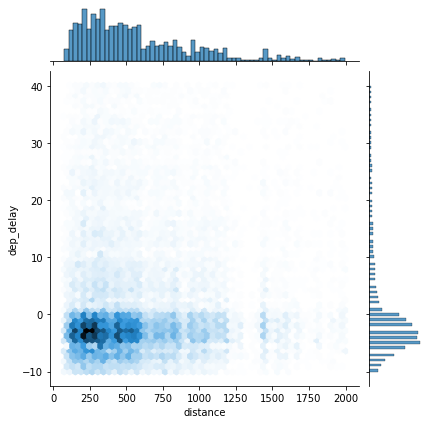

In [0]:
df_pd['distance'] = pd.to_numeric(df_pd['distance'])
df_pd['dep_delay'] = pd.to_numeric(df_pd['dep_delay'])
sns.jointplot(data=df_pd, x='distance', y='dep_delay', kind='hex')
plt.show()

## 19. For the rest, continue to work on df_spark_ontime. Cast the 'DISTANCE' to float and 'ontime' to int. Use Spark approxQuantile() to create 4 bins along 'DISTANCE'. The bins should contain approximately equal number of flights. Store the boundary info in a list 'distthresh'.

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, FloatType

df_spark_ontime = df_spark_ontime.withColumn("DISTANCE", col("DISTANCE").cast(FloatType()))
df_spark_ontime = df_spark_ontime.withColumn("ontime", col("ontime").cast(IntegerType()))
quantiles = df_spark_ontime.approxQuantile("DISTANCE", [0.25, 0.5, 0.75], 0.01)

distthresh = [float("-inf")] + quantiles + [float("inf")]
distthresh

[-inf, 271.0, 455.0, 749.0, inf]

## 20. Use Spark approxQuantile() to create 4 bins along 'DEP_DELAY'. The bins should contains approximately equal number of flights. Store the boundary info in a list 'delaythresh'.

In [0]:
quantiles = df_spark_ontime.approxQuantile("DEP_DELAY", [0.25, 0.5, 0.75], 0.01)

delaythresh = [float("-inf")] + quantiles + [float("inf")]

delaythresh

[-inf, -5.0, -2.0, 2.0, inf]

## 21. Write a program to compute the fraction (probability) of ontime flights in each combination of the 'DISTANCE' and 'DEP_DELAY bins. Store the results in a Pandas DataFrame with the columns ['dist_thresh', 'delay_thresh', 'frac_ontime']. Show the DataFrame with 16 records.

In [0]:
results = []

# Compute the fraction of on-time flights for each combination of bins
for dist_start, dist_end in zip(distthresh[:-1], distthresh[1:]):
    for delay_start, delay_end in zip(delaythresh[:-1], delaythresh[1:]):
        # Filter the dataframe based on the bin boundaries
        filtered_df = df_spark_ontime.filter(
            (col("DISTANCE") >= dist_start) & (col("DISTANCE") < dist_end) &
            (col("DEP_DELAY") >= delay_start) & (col("DEP_DELAY") < delay_end)
        )
        # Compute the fraction of on-time flights
        total_flights = filtered_df.count()
        ontime_flights = filtered_df.filter(col("ontime") == 1).count()
        frac_ontime = ontime_flights / total_flights if total_flights > 0 else 0.0
        # Append the results to the list
        results.append((dist_start, delay_start, frac_ontime))

# Create a Pandas DataFrame from the results list
df_results = pd.DataFrame(results, columns=['dist_thresh', 'delay_thresh', 'frac_ontime'])
df_results

dist_thresh delay_thresh frac_ontime
0 -inf -inf 0.982707
1 -inf -5.0 0.977430
2 -inf -2.0 0.955888
3 -inf 2.0 0.639072
4 271.0 -inf 0.986491
5 271.0 -5.0 0.979471
6 271.0 -2.0 0.966319
7 271.0 2.0 0.665424
8 455.0 -inf 0.981106
9 455.0 -5.0 0.973054
10 455.0 -2.0 0.956167
11 455.0 2.0 0.666252
12 749.0 -inf 0.979329
13 749.0 -5.0 0.974360
14 749.0 -2.0 0.956500
15 749.0 2.0 0.702445

## 22. Discuss your findings: Based on the two variables, 'DEP_DELAY' and 'DISTANCE', how would you make decision on canceling a meeting at the destination, if:
### - the flight may arrive more than 15 minutes later with 30% chance.
### - the flight may arrive more than 15 minutes late with 20% chance.
### - other considerations?

- **The flight may arrive more than 15 minutes later with a 30% chance**:
In this case, we need to consider the combination of 'DEP_DELAY' and 'DISTANCE' bins where the fraction of on-time flights is less than 70% (1 - 30%).
If a significant portion of the flights in those bins are delayed, it might be risky to proceed with the meeting as there is a high chance of the flight arriving late.
- **The flight may arrive more than 15 minutes late with a 20% chance**:
Similar to the previous scenario, we would look at the combinations of 'DEP_DELAY' and 'DISTANCE' bins where the fraction of on-time flights is less than 80% (1 - 20%).
If those bins show a considerable number of delayed flights, there is still a significant risk of the flight arriving late, although slightly lower than in the previous scenario.
- **Other considerations**:
Apart from the probability of flight delays, other factors may also influence the decision to cancel a meeting at the destination.
Important factors could include the importance of the meeting, the flexibility of the schedule, availability of alternative travel options, and the impact of potential delays on the overall purpose and outcome of the meeting.
It's also worth considering any contingencies or backup plans in case of flight delays, such as rescheduling the meeting or utilizing virtual meeting options.